<a href="https://colab.research.google.com/github/Morozova91/Diplom/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Этот проект посвящен библиотекам для визуализации данных на Python. Визуализация данных является важным инструментом для анализа и представления информации в понятной и доступной форме. Представлены основные библиотеки, их особенности, преимущества и недостатки.
## Содержание

- [1. Matplotlib](#1-matplotlib)
- [2. Seaborn](#2-seaborn)   
- [3. Plotly](#3-plotly)   
- [4. Рекомендации по выбору библиотеки](#5-рекомендации-по-выбору-библиотеки)


-5. Ссылки на Google Colab дипломной работы:  

Seaborn: https://colab.research.google.com/drive/1JO8OlDImuRCJKkHQVK9ZMuyx9gtUVWjI?usp=sharing


Plotly:  https://colab.research.google.com/drive/1qEUlNVyn_MZC4tMtcv68lXs881UnpySq?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""Импортируем нужные библиотеки для анализа данных и визуалиции"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import plotly
import plotly.express as px

In [ ]:
# Считаем данные из двух таблиц
covid_data = pd.read_csv('/content/drive/MyDrive/Копия covid_data.csv')
vaccinations_data = pd.read_csv('/content/drive/MyDrive/Копия country_vaccinations.csv')
covid_data.head()
vaccinations_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


Обзор данных:
date — дата наблюдения;
rovince/state — наименование провинции/штата;#country — наименование страны;
confirmed — общее число зафиксированных случаев на указанный день;
deaths — общее число зафиксированных смертей на указанный день;
recovered — общее число выздоровлений на указанный день.

In [ ]:
#Aгрегируем данные о COVID-19, группируя их по дате и стране, а затем суммируя значения по столбцам "confirmed"
#(подтвержденные случаи), "deaths" (смертельные случаи) и "recovered" (выздоровления).
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
#Преобразуем столбец, чтобы не было ошибок при работе с датой
covid_data['date'] = pd.to_datetime(covid_data['date'])
#Создадим признак больных на данный момент (active).
#Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
#Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей.
#Для этого отсортируем данные по датам, а затем по названиям стран. После этого произведём группировку по странам и рассчитаем разницу
#между «вчера и сегодня» с помощью метода diff():
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [ ]:
#Переведем данные date в формате datetime для корректной работы с датой
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
# Также Вы создам новый DataFrame, в
#котором оставлю только определённые столбцы. Будет полезно для упрощения анализа данных и удаления ненужной информации.
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations',
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [ ]:
# Объединение таблиц с помощью merge и вывод данных
covid_df = pd.merge(covid_data, vaccinations_data,on =['date','country'],how='left')
display(covid_df)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Выполним расчет показателей смертности и выздоровления от COVID-19 на основе данных в DataFrame covid_df,
#а затем сгруппируем данные по странам для вычисления средних значений коэффициента выздоровления.
covid_df['death_rate'] = (covid_df['deaths']/covid_df['confirmed'])*100 # Расчет коэффициента смертности
covid_df['recover_rate']= (covid_df['recovered']/covid_df['confirmed'])*100 # Расчет коэффициента выздоровления
covid_df.groupby('country')['recover_rate'].mean().head(170) # Группировка данных по странам и вычисление среднего коэффициента выздоровления

,recover_rate
country,
Afghanistan,61.835322
Albania,59.606364
Algeria,60.550581
Andorra,77.976423
Angola,53.747304
...,...
Romania,66.533729
Russia,67.062735
Rwanda,69.193586



## 1. Matplotlib

*Описание*: Одна из самых популярных и мощных библиотек для создания статических, а также анимационных и интерактивных графиков на Python.

*Преимущества*:
- Широкие возможности настройки графиков.
- Поддержка различных типов графиков (линейные, столбчатые, круговые и др.).
- Хорошая интеграция с другими библиотеками (например, Pandas).

*Недостатки*:
- Требует больше кода для создания сложных графиков по сравнению с другими библиотеками.
- Стиль графиков может выглядеть устаревшим без дополнительной настройки.


Данные готовы к визуализации.
Начнём с исследования заболеваемости коронавирусом во всём мире.
Для этого используем библиотеку Matplotlib.


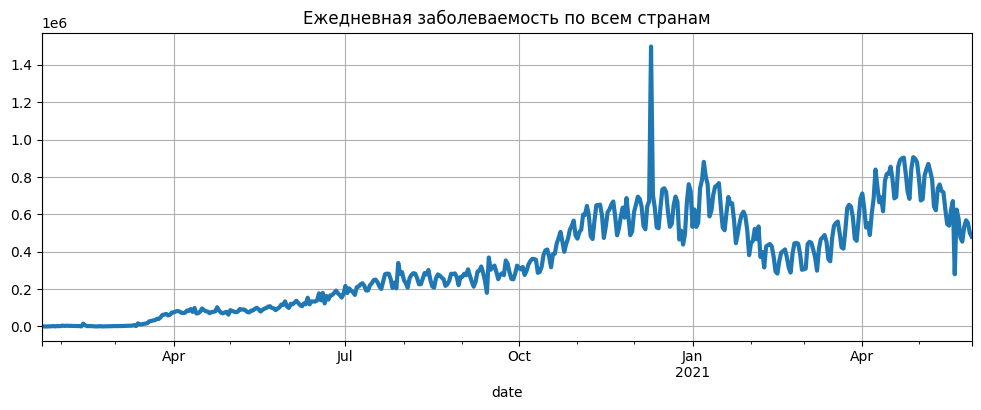

In [ ]:
# Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим на линейном графике,
#как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени.
#Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot( # Метод plot используется для создания графиков на основе данных, содержащихся в этом объекте.
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
);

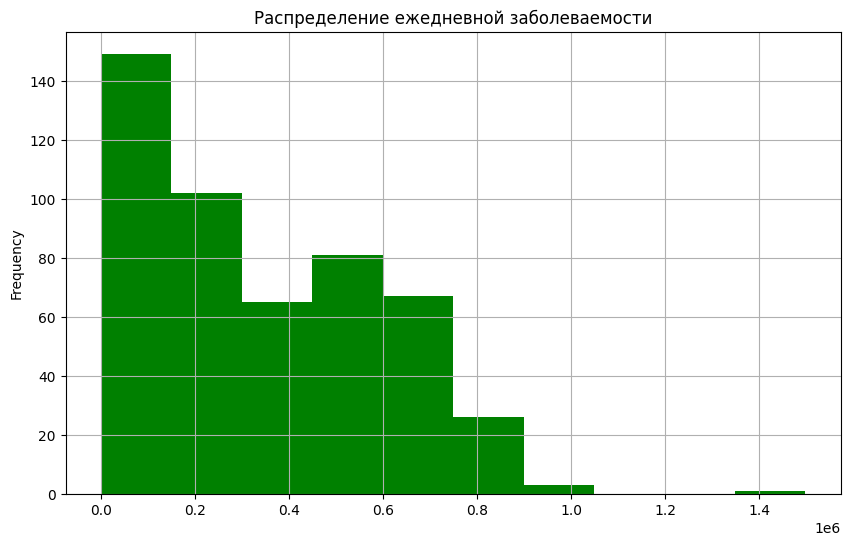

In [ ]:
#Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире.
#Для этого параметр kind выставляем на значение 'hist'.
#Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'green',
    bins=10
);

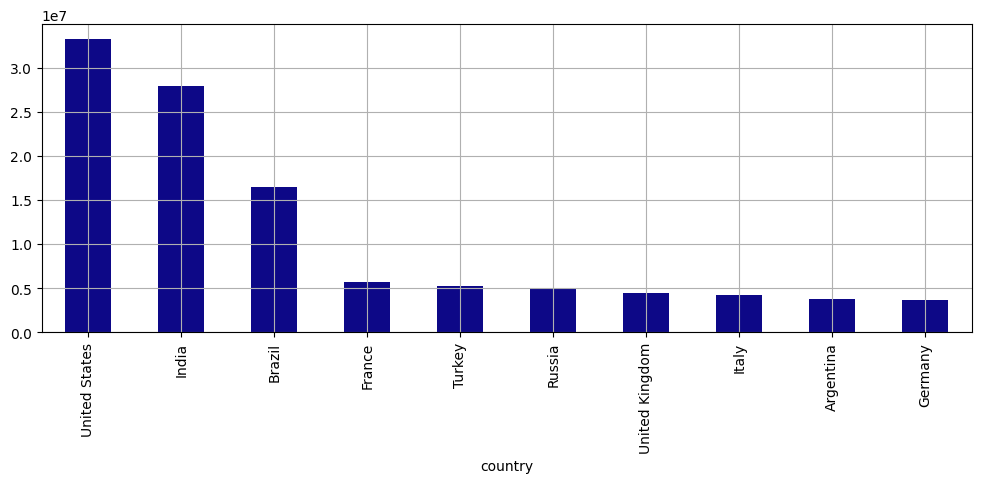

In [ ]:
#Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.
#Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() —
#он возвращает последнее значение в столбце DataFrame.
#Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

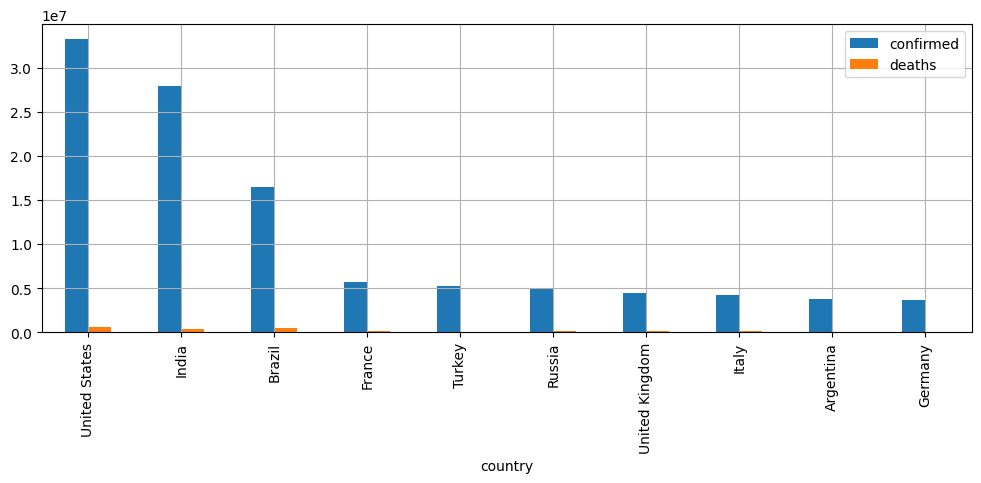

In [ ]:
#как в этих десяти странах соотносится количество заболевших и умерших от вируса.
#Для этого отобразим сразу два показателя на столбчатой диаграмме:

grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4)
);

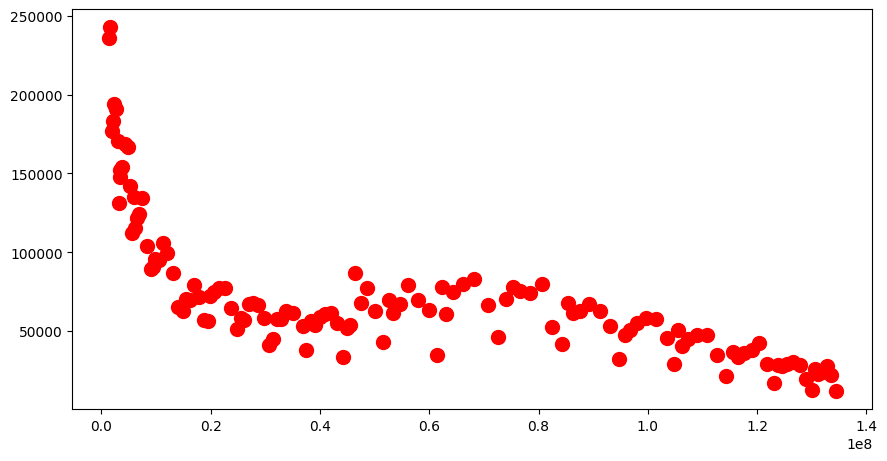

In [ ]:
#Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией
#(но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния(scatter plot),
#которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего
#количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],  # значения по оси X (количество полностью вакцинированных).
    y=us_data['daily_confirmed'], #  y: значения по оси Y (ежедневные подтвержденные случаи).
    s=100, # s: размер маркеров.
    marker='o', # marker: форма маркеров (в данном случае круги).
    c = 'red' # c: цвет маркеров (красный).
);

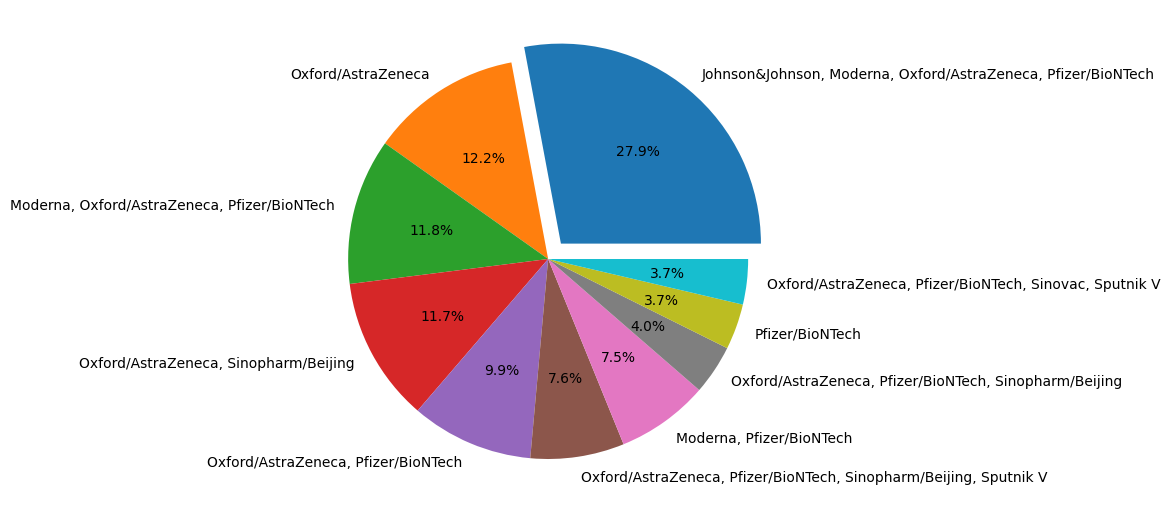

In [ ]:
#Топ-10 вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы.
# Будем отображать доли в процентах и округлять их до одного знака после запятой.
#Самую распространённую вакцину сместим на 10 % от центра:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,# Указывает метки для каждого сектора диаграммы
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

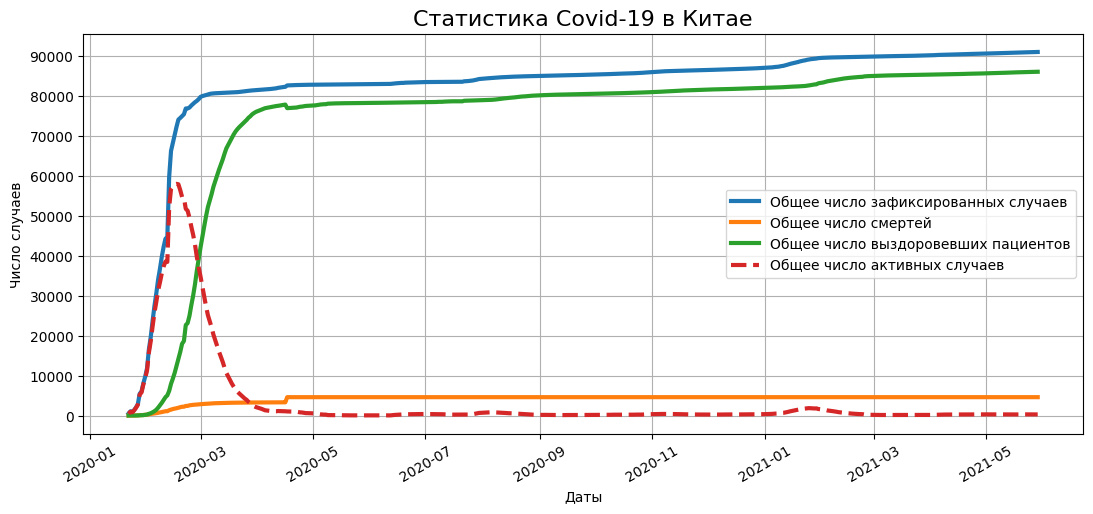

In [ ]:
#Например, изобразим на одном графике, как росла общая заболеваемость (confirmed),
#число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.
#Для построения линейных графиков в Matplotlib используется метод plot()
#При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты).
#Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде,
#а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000,
#повернём метки по оси x на 30 градусов,
#а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

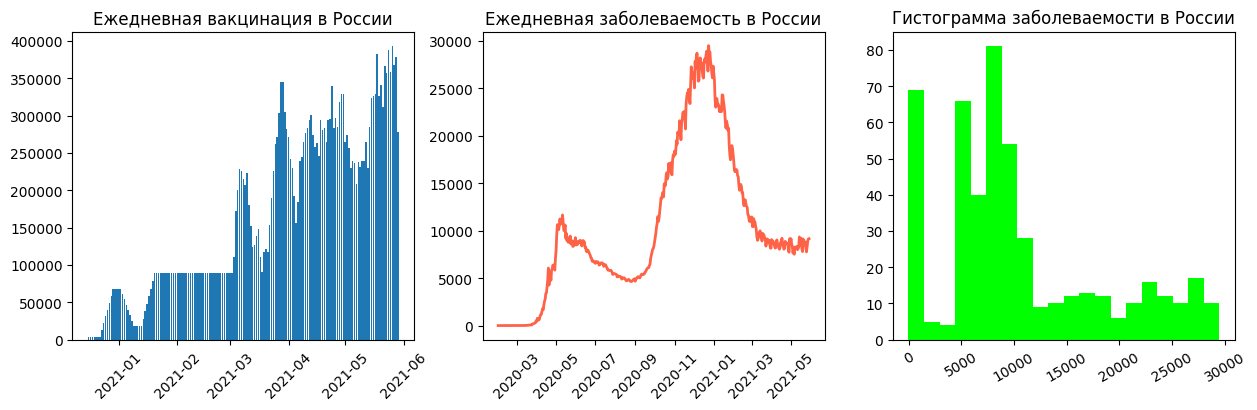

In [ ]:
#SUBPLOTS
#Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
#Линейный график изменения ежедневной заболеваемости в стране.
#Гистограмму ежедневной заболеваемости в стране.
russia_data = covid_df[covid_df['country'] == 'Russia']

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))   # Cоздаем одну строку с тремя столбцами для графиков.

#столбчатая диаграмма
axes[0].bar(x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

#линейный график
axes[1].plot(russia_data['date'],
    russia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato', lw=2
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[2].hist(x=russia_data['daily_confirmed'],
    label=['Число заболевших'],
    color='lime', bins = 20
)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)

## Использование

Примеры использования библиотек можно найти в документации каждой из них:

- [Matplotlib](https://matplotlib.org/stable/contents.html)


## 4. Рекомендации по выбору библиотеки

- *Для простых и статических графиков*: Matplotlib или Seaborn.
- *Для сложных статистических графиков*: Seaborn.
- *Для интерактивных визуализаций*: Plotly.


## Заключение

Выбор библиотеки для визуализации данных зависит от ваших конкретных задач и уровня подготовки. Каждая из перечисленных библиотек имеет свои сильные и слабые стороны, и часто полезно комбинировать их в зависимости от требований проекта.